# Classification 
to be done soon

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
labels_dict = {'Crop': 1, 'None-Crop': 0}

In [3]:
df = pd.read_csv('results/training_data/gm_mads_two_seasons_training_data_20201123.csv', sep=' ')
df.shape

(3429, 34)

In [4]:
df.head()

,Class,red_S1,blue_S1,green_S1,nir_S1,swir_1_S1,swir_2_S1,red_edge_1_S1,red_edge_2_S1,red_edge_3_S1,...,red_edge_2_S2,red_edge_3_S2,edev_S2,sdev_S2,bcdev_S2,NDVI_S2,LAI_S2,MNDWI_S2,rain_S2,slope
0,1.0,0.127868,0.077203,0.111521,0.301339,0.359995,0.281281,0.185274,0.261258,0.291511,...,0.257073,0.283351,2.246781,7.064623,2.952092,0.224958,0.474304,-0.536428,349.551086,3.004626
1,1.0,0.092796,0.055081,0.083433,0.249427,0.301828,0.225577,0.137628,0.219576,0.250052,...,0.205870,0.229395,2.494673,7.128056,3.041181,0.181854,0.306314,-0.584877,324.542236,2.946278
2,1.0,0.064913,0.049440,0.061939,0.155016,0.221684,0.153777,0.088279,0.136593,0.153667,...,0.096557,0.106952,3.291765,6.074180,2.997704,0.170631,0.131878,-0.592229,324.565796,3.173239
3,1.0,0.140223,0.059727,0.094393,0.255655,0.331874,0.274991,0.186378,0.238805,0.259208,...,0.235046,0.253394,3.203019,7.648440,3.601598,0.261642,0.449042,-0.570569,323.140869,19.110134
4,1.0,0.085796,0.061010,0.083576,0.201338,0.263326,0.182804,0.129189,0.181609,0.203615,...,0.136283,0.151102,3.189153,6.454077,3.263663,0.193874,0.233971,-0.550557,324.611938,3.004626


In [5]:
df.columns

Index(['Class', 'red_S1', 'blue_S1', 'green_S1', 'nir_S1', 'swir_1_S1',
       'swir_2_S1', 'red_edge_1_S1', 'red_edge_2_S1', 'red_edge_3_S1',
       'edev_S1', 'sdev_S1', 'bcdev_S1', 'NDVI_S1', 'LAI_S1', 'MNDWI_S1',
       'rain_S1', 'red_S2', 'blue_S2', 'green_S2', 'nir_S2', 'swir_1_S2',
       'swir_2_S2', 'red_edge_1_S2', 'red_edge_2_S2', 'red_edge_3_S2',
       'edev_S2', 'sdev_S2', 'bcdev_S2', 'NDVI_S2', 'LAI_S2', 'MNDWI_S2',
       'rain_S2', 'slope'],
      dtype='object')

In [6]:
X = df.drop(['Class'], axis=1).values
y = df['Class'].ravel()

In [7]:
X.shape, y.shape

((3429, 33), (3429,))

# Visualization

>Standardize features by removing the mean and scaling to unit variance. The standard score of a sample x is calculated as:

   $$ z = (x - u) / s $$

In [8]:
# Standartize the dataset
scale = StandardScaler()
x_scaled = scale.fit_transform(X)

# verify joblib to dump and load scale model
refere: https://stackoverflow.com/questions/34143829/sklearn-how-to-save-a-model-created-from-a-pipeline-and-gridsearchcv-using-jobli

In [9]:
import joblib
joblib.dump(scale, 'scale.model')

['scale.model']

In [10]:
scale2 = joblib.load('scale.model')

In [11]:
x_scaled2 = scale2.fit_transform(X)

In [12]:
np.equal(x_scaled, x_scaled2)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [13]:
# Use PCA only for visualization
pca = PCA(n_components=16, whiten=True)
x_pca = pca.fit_transform(x_scaled)

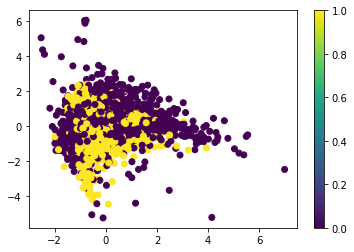

In [14]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=y)
plt.colorbar()
plt.show()

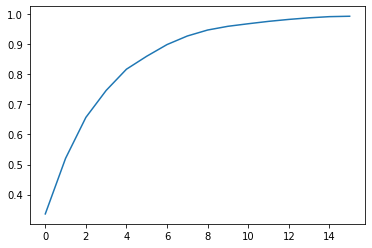

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [16]:
# Use LDA only for visualization
lda = LDA()
x_lda = lda.fit_transform(x_scaled, y)

In [17]:
x_lda

array([[ 0.08230825],
       [ 0.74290407],
       [-0.24810571],
       ...,
       [ 2.11580307],
       [ 1.87485133],
       [-0.94436704]])

In [18]:
x_lda.shape

(3429, 1)

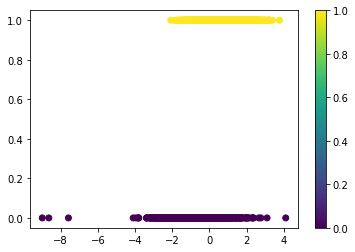

In [19]:
# plt.scatter(x_lda[:,0], x_lda[:,1], c=y)
plt.scatter(x_lda, y, c=y)
plt.colorbar()
plt.show()

In [20]:
# Using tsne
tsne = TSNE(n_components=2, verbose=1, learning_rate=250)
x_tsne = tsne.fit_transform(x_scaled)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3429 samples in 0.009s...
[t-SNE] Computed neighbors for 3429 samples in 0.683s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3429
[t-SNE] Computed conditional probabilities for sample 2000 / 3429
[t-SNE] Computed conditional probabilities for sample 3000 / 3429
[t-SNE] Computed conditional probabilities for sample 3429 / 3429
[t-SNE] Mean sigma: 1.266008
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.225060
[t-SNE] KL divergence after 1000 iterations: 1.406794


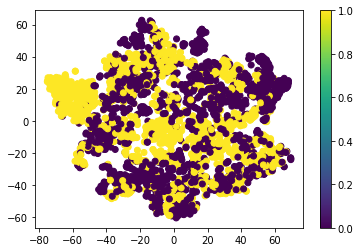

In [21]:
plt.scatter(x_tsne[:,0], x_tsne[:,1], c=y)
plt.colorbar()
plt.show()

# Classification

In [22]:
# Helper to plot confusion matrix -- from Scikit-learn website
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# K-Fold cross-validation with classic mahcine learning classifiers
- The cllasifiers: Decision Tree, Logistic Regression, Random Forest, SVM
- The above Linear Discriminant Analysis indicate that manual features for the first 1 min mp3 can be linearly classified. So, the accuracies are very high with the listed classifiers.

In [23]:
# K-Fold helper
def kfold_validate(clf, X, y, k_folds = 5, zscale=True):
    # Constants
    acc, count, cm = [], 0, 0
    kf = StratifiedKFold(n_splits=k_folds, shuffle = True, random_state=4321)
    if zscale:
        # Normalize the data
        scale = StandardScaler()
        scale.fit(X)
        X = scale.transform(X)
    # K-fold split
    for train_idx, test_idx in kf.split(X, y):
        # Count each fold are we validating
        count += 1
        
        # Separe training and test in the Training set for k-Fold
        fold_Xtrain, fold_Xtest = X[train_idx], X[test_idx]
        fold_ytrain, fold_ytest = y[train_idx], y[test_idx]
#          # Normalize the data
#         scale = StandardScaler()
#         scale.fit(fold_Xtrain)
#         fold_Xtrain = scale.transform(fold_Xtrain)
#         fold_Xtest = scale.transform(fold_Xtest)

        # Train
        clf = sklearn.base.clone(clf)
        clf.fit(fold_Xtrain, fold_ytrain)
        pred = clf.predict(fold_Xtest)
        accuracy = accuracy_score(fold_ytest, pred)
        cm += confusion_matrix(fold_ytest, pred)
        acc.append(accuracy)
        print("Fold: %s of % s => accuracy_score = %s" %(count, k_folds, accuracy))
    
    print("\n::Accuracy_score statistics::")
    print("Mean = {0:.5f}".format(np.mean(acc)))
    print("STD = {0:.5f}".format(np.std(acc)))
    return cm

Fold: 1 of 5 => accuracy_score = 0.7623906705539358
Fold: 2 of 5 => accuracy_score = 0.7900874635568513
Fold: 3 of 5 => accuracy_score = 0.793002915451895
Fold: 4 of 5 => accuracy_score = 0.7536443148688047
Fold: 5 of 5 => accuracy_score = 0.7635036496350365

::Accuracy_score statistics::
Mean = 0.77253
STD = 0.01593


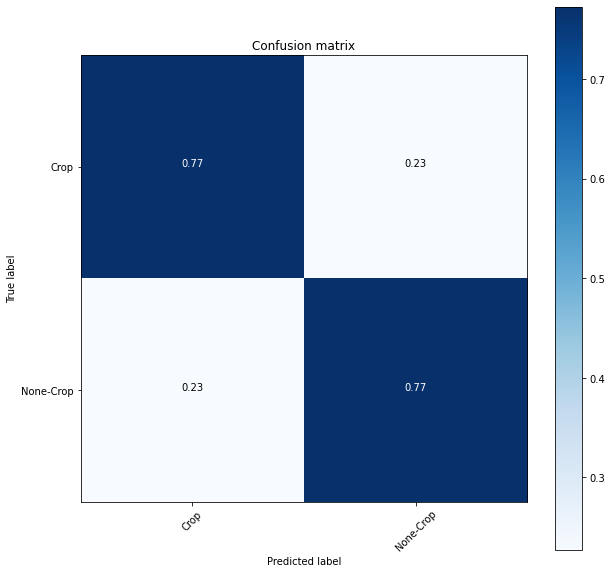

In [24]:
# Decision Tree
cart = DecisionTreeClassifier(criterion = 'entropy')
cm = kfold_validate(cart, X, y)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, labels_dict.keys(), normalize=True)

In [25]:
cart.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [26]:
sorted(zip(cart.feature_importances_, df.columns[1:]), reverse=True)

[(0.13610100718543922, 'rain_S1'),
 (0.1053300110795131, 'rain_S2'),
 (0.0764963451627027, 'swir_2_S1'),
 (0.046038424595426966, 'slope'),
 (0.04266525604789, 'swir_2_S2'),
 (0.04077245625133881, 'blue_S1'),
 (0.039927949355060104, 'red_edge_1_S1'),
 (0.03720062835043878, 'sdev_S2'),
 (0.03581458439562595, 'bcdev_S2'),
 (0.034274626200976856, 'LAI_S1'),
 (0.03418097599948366, 'MNDWI_S2'),
 (0.03395432072679204, 'sdev_S1'),
 (0.03256063206339634, 'red_edge_2_S2'),
 (0.03216904160974896, 'blue_S2'),
 (0.028688318947381778, 'bcdev_S1'),
 (0.02860994585494559, 'NDVI_S1'),
 (0.02249509906808956, 'red_S1'),
 (0.0215339543896918, 'swir_1_S1'),
 (0.020580004249278173, 'MNDWI_S1'),
 (0.01957037538177601, 'swir_1_S2'),
 (0.017623374541058785, 'LAI_S2'),
 (0.014790127275422829, 'red_edge_3_S1'),
 (0.014366762632127873, 'NDVI_S2'),
 (0.012266798932124592, 'edev_S1'),
 (0.01053432029924863, 'red_edge_1_S2'),
 (0.010149803468852006, 'nir_S2'),
 (0.009723298536394214, 'edev_S2'),
 (0.0089238964108645

/env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warn

Fold: 1 of 5 => accuracy_score = 0.8002915451895044
Fold: 2 of 5 => accuracy_score = 0.7784256559766763
Fold: 3 of 5 => accuracy_score = 0.7944606413994169


/env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warn

Fold: 4 of 5 => accuracy_score = 0.760932944606414
Fold: 5 of 5 => accuracy_score = 0.8087591240875912

::Accuracy_score statistics::
Mean = 0.78857
STD = 0.01701


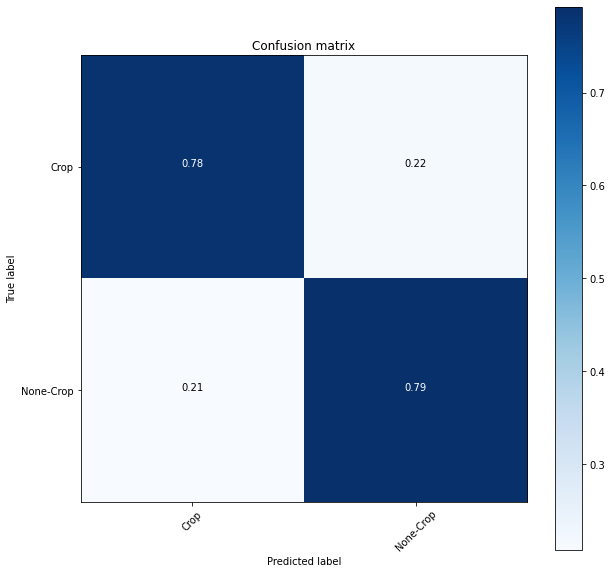

In [27]:
# Logistic Regression
lr = LogisticRegression(penalty='l2', C = 1)
cm = kfold_validate(lr, X, y)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, labels_dict.keys(), normalize=True)

Fold: 1 of 5 => accuracy_score = 0.8556851311953353
Fold: 2 of 5 => accuracy_score = 0.8644314868804664
Fold: 3 of 5 => accuracy_score = 0.8629737609329446
Fold: 4 of 5 => accuracy_score = 0.8658892128279884
Fold: 5 of 5 => accuracy_score = 0.8817518248175182

::Accuracy_score statistics::
Mean = 0.86615
STD = 0.00856


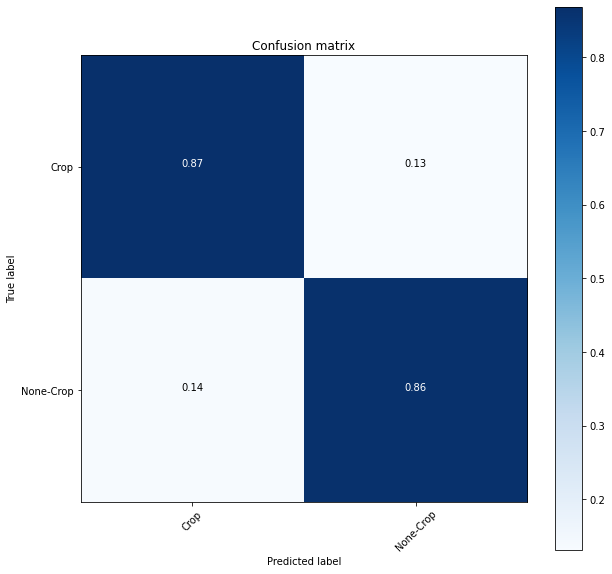

In [28]:
# Random Forests
rf = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth = 15)
cm = kfold_validate(rf, X, y)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, labels_dict.keys(), normalize=True)

In [29]:
rf.fit(X, y)
sorted(zip(rf.feature_importances_, df.columns[1:]), reverse=True)

[(0.07795920429398176, 'rain_S1'),
 (0.06762122014891625, 'rain_S2'),
 (0.04465947737805947, 'swir_2_S1'),
 (0.04399352513724707, 'sdev_S1'),
 (0.04041330720301722, 'red_S1'),
 (0.03489562621996335, 'swir_2_S2'),
 (0.03434072942676697, 'slope'),
 (0.033461077343186346, 'sdev_S2'),
 (0.031785615797633386, 'NDVI_S1'),
 (0.029480604050379756, 'edev_S1'),
 (0.028888973454235942, 'LAI_S1'),
 (0.028719640010462125, 'blue_S2'),
 (0.02792898757744267, 'red_edge_2_S2'),
 (0.027865656912217807, 'red_edge_1_S1'),
 (0.027346998917667495, 'LAI_S2'),
 (0.026574217646033252, 'red_S2'),
 (0.02604026685071967, 'swir_1_S2'),
 (0.02564732377866291, 'swir_1_S1'),
 (0.025230801447448135, 'red_edge_1_S2'),
 (0.0250950590216063, 'NDVI_S2'),
 (0.024684498499430496, 'blue_S1'),
 (0.02430407963554863, 'bcdev_S1'),
 (0.024226449631337514, 'MNDWI_S2'),
 (0.024173123895165946, 'MNDWI_S1'),
 (0.023390716698026698, 'red_edge_2_S1'),
 (0.022751769875063846, 'red_edge_3_S2'),
 (0.022672079428983534, 'nir_S1'),
 (0.022

In [30]:
cum_sum = 0
for i, (v, n) in enumerate(sorted(zip(rf.feature_importances_, df.columns[1:]), reverse=True)):
    cum_sum += v
    if cum_sum > 0.9:
        print(i)
        break

28


Fold: 1 of 5 => accuracy_score = 0.8731778425655977
Fold: 2 of 5 => accuracy_score = 0.8746355685131195
Fold: 3 of 5 => accuracy_score = 0.89067055393586
Fold: 4 of 5 => accuracy_score = 0.8644314868804664
Fold: 5 of 5 => accuracy_score = 0.8744525547445255

::Accuracy_score statistics::
Mean = 0.87547
STD = 0.00848


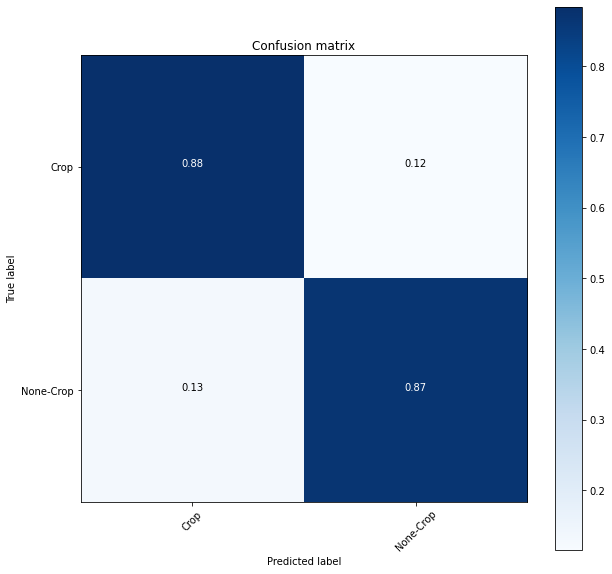

In [31]:
# SVM
# 'linear', 'poly', 'rbf', 'sigmoid'
svm = SVC(C=2, kernel='rbf')
cm = kfold_validate(svm, X, y)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, labels_dict.keys(), normalize=True)

Fold: 1 of 5 => accuracy_score = 0.8177842565597667
Fold: 2 of 5 => accuracy_score = 0.7798833819241983
Fold: 3 of 5 => accuracy_score = 0.793002915451895
Fold: 4 of 5 => accuracy_score = 0.7798833819241983
Fold: 5 of 5 => accuracy_score = 0.8014598540145985

::Accuracy_score statistics::
Mean = 0.79440
STD = 0.01428


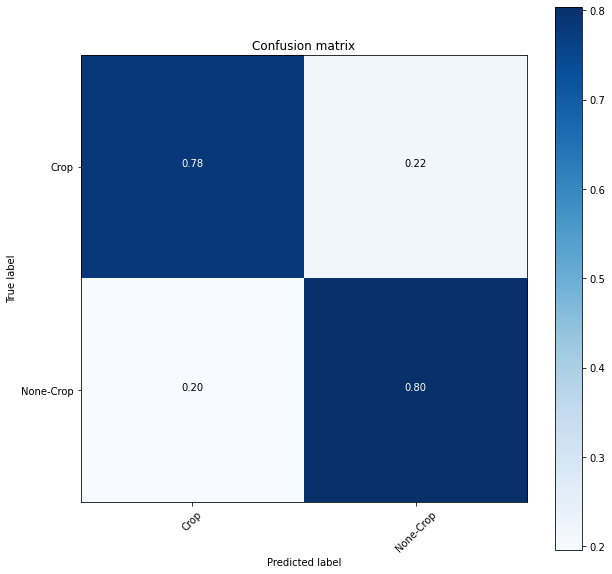

In [32]:
# SVM
# 'linear', 'poly', 'rbf', 'sigmoid'
svm = SVC(C=2, kernel='linear')
cm = kfold_validate(svm, X, y)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, labels_dict.keys(), normalize=True)

Fold: 1 of 5 => accuracy_score = 0.858600583090379
Fold: 2 of 5 => accuracy_score = 0.8396501457725948
Fold: 3 of 5 => accuracy_score = 0.8483965014577259
Fold: 4 of 5 => accuracy_score = 0.8221574344023324
Fold: 5 of 5 => accuracy_score = 0.8379562043795621

::Accuracy_score statistics::
Mean = 0.84135
STD = 0.01208


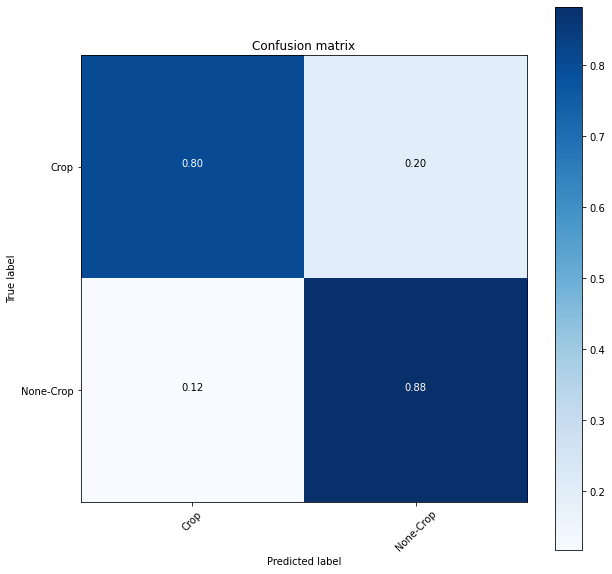

In [33]:
# SVM
# 'linear', 'poly', 'rbf', 'sigmoid'
svm = SVC(C=2, kernel='poly')
cm = kfold_validate(svm, X, y)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, labels_dict.keys(), normalize=True)

Fold: 1 of 5 => accuracy_score = 0.5539358600583091
Fold: 2 of 5 => accuracy_score = 0.5743440233236151
Fold: 3 of 5 => accuracy_score = 0.5364431486880467
Fold: 4 of 5 => accuracy_score = 0.5743440233236151
Fold: 5 of 5 => accuracy_score = 0.6160583941605839

::Accuracy_score statistics::
Mean = 0.57103
STD = 0.02660


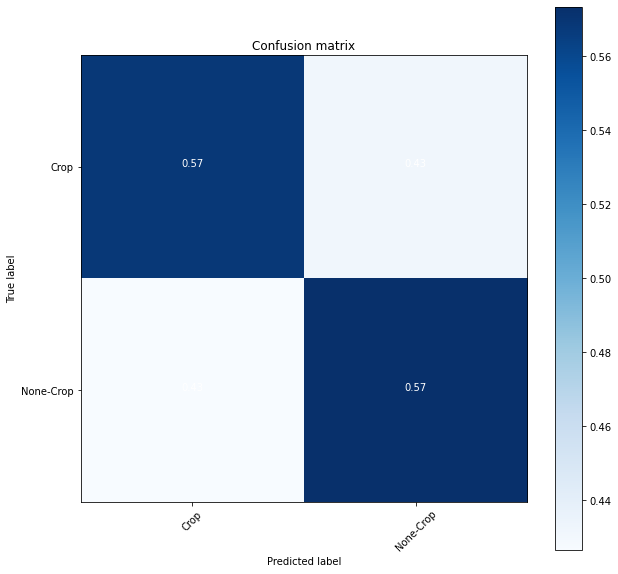

In [34]:
# SVM
# 'linear', 'poly', 'rbf', 'sigmoid'
svm = SVC(C=2, kernel='sigmoid')
cm = kfold_validate(svm, X, y)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, labels_dict.keys(), normalize=True)

# Xgboost method
Refer: https://xgboost.readthedocs.io/en/latest/python/python_intro.html

/env/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:05:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold: 1 of 5 => accuracy_score = 0.892128279883382
[13:05:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold: 2 of 5 => accuracy_score = 0.8819241982507289
[13:05:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold: 3 of 5 => accuracy_score = 0.9052478134110787
[13:05:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evalua

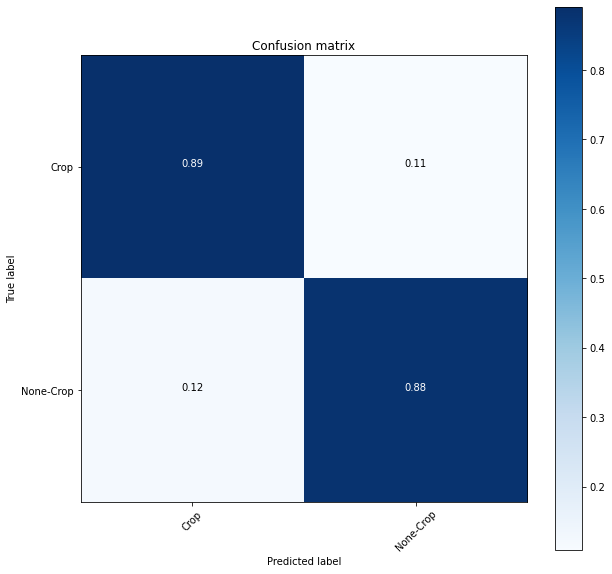

In [35]:
import xgboost as xgb

mod = xgb.XGBClassifier()
cm = kfold_validate(mod, X, y.astype(int))
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, labels_dict.keys(), normalize=True)

In [36]:
mod = xgb.XGBClassifier()
mod.fit(X, y)

[13:05:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
sorted(zip(mod.feature_importances_, df.columns[1:]), reverse=True)

[(0.07076801, 'swir_2_S1'),
 (0.057938382, 'rain_S1'),
 (0.052039266, 'red_edge_1_S1'),
 (0.04539894, 'rain_S2'),
 (0.042235754, 'red_edge_2_S1'),
 (0.040856082, 'red_edge_2_S2'),
 (0.039600592, 'slope'),
 (0.03669429, 'swir_2_S2'),
 (0.03597803, 'LAI_S1'),
 (0.034004852, 'LAI_S2'),
 (0.03347456, 'NDVI_S2'),
 (0.033396885, 'sdev_S2'),
 (0.032464743, 'blue_S1'),
 (0.03168639, 'red_edge_1_S2'),
 (0.028759396, 'blue_S2'),
 (0.02840143, 'MNDWI_S1'),
 (0.02798637, 'red_S2'),
 (0.027824434, 'NDVI_S1'),
 (0.026471214, 'sdev_S1'),
 (0.026273606, 'red_S1'),
 (0.025535302, 'MNDWI_S2'),
 (0.024106633, 'edev_S1'),
 (0.021976762, 'nir_S1'),
 (0.021781614, 'bcdev_S1'),
 (0.021037584, 'swir_1_S1'),
 (0.020864472, 'red_edge_3_S1'),
 (0.018666161, 'swir_1_S2'),
 (0.017819382, 'nir_S2'),
 (0.017673425, 'bcdev_S2'),
 (0.016039224, 'red_edge_3_S2'),
 (0.015849393, 'green_S1'),
 (0.014298309, 'green_S2'),
 (0.01209854, 'edev_S2')]

In [38]:
mod.feature_importances_.argmax(), df.columns[1:][5]

(5, 'swir_2_S1')

In [39]:
feature_name_mapping = dict((k, v) for k, v in zip(mod.get_booster().feature_names, df.columns[1:]))

In [40]:
feature_name_mapping

{'f0': 'red_S1',
 'f1': 'blue_S1',
 'f2': 'green_S1',
 'f3': 'nir_S1',
 'f4': 'swir_1_S1',
 'f5': 'swir_2_S1',
 'f6': 'red_edge_1_S1',
 'f7': 'red_edge_2_S1',
 'f8': 'red_edge_3_S1',
 'f9': 'edev_S1',
 'f10': 'sdev_S1',
 'f11': 'bcdev_S1',
 'f12': 'NDVI_S1',
 'f13': 'LAI_S1',
 'f14': 'MNDWI_S1',
 'f15': 'rain_S1',
 'f16': 'red_S2',
 'f17': 'blue_S2',
 'f18': 'green_S2',
 'f19': 'nir_S2',
 'f20': 'swir_1_S2',
 'f21': 'swir_2_S2',
 'f22': 'red_edge_1_S2',
 'f23': 'red_edge_2_S2',
 'f24': 'red_edge_3_S2',
 'f25': 'edev_S2',
 'f26': 'sdev_S2',
 'f27': 'bcdev_S2',
 'f28': 'NDVI_S2',
 'f29': 'LAI_S2',
 'f30': 'MNDWI_S2',
 'f31': 'rain_S2',
 'f32': 'slope'}

# importance_type (str, default "weight") –

How the importance is calculated: either “weight”, “gain”, or “cover”

”weight” is the number of times a feature appears in a tree

”gain” is the average gain of splits which use the feature

”cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split

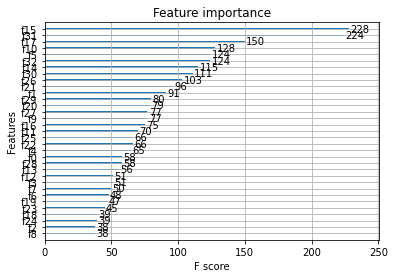

In [50]:
xgb.plot_importance(mod)

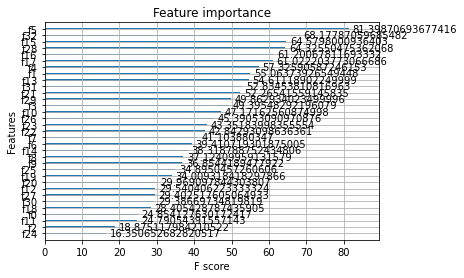

In [41]:
xgb.plot_importance(mod, importance_type='cover')

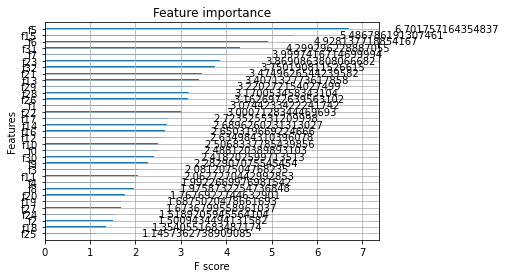

In [49]:
xgb.plot_importance(mod, importance_type='gain')

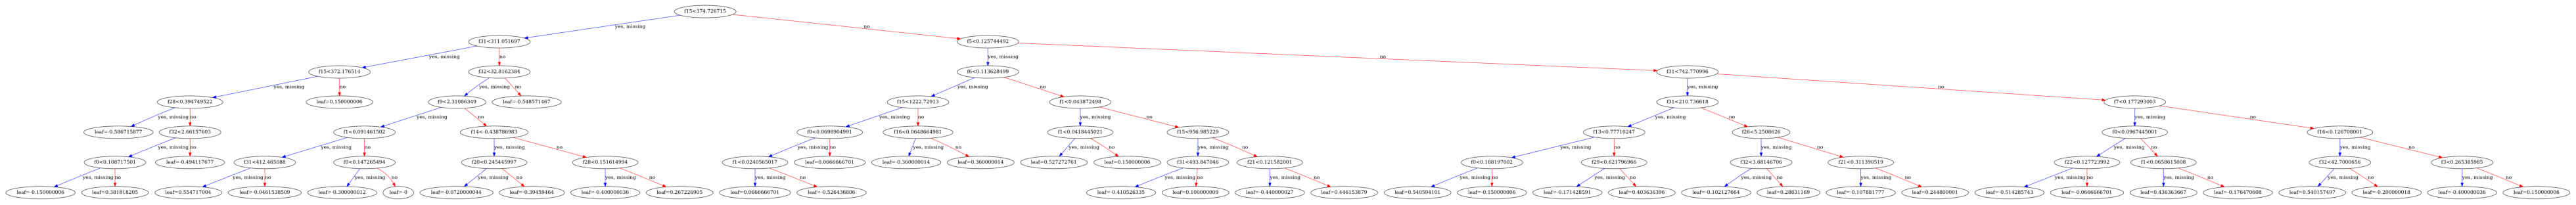

In [54]:
plt.figure(figsize=(70, 7))
xgb.plot_tree(mod, ax=plt.gca())
plt.savefig('tree.png')

In [56]:
mod.n_estimators

100

In [ ]:
xgb.to_graphviz(mod, num_trees)

In [43]:
import shap

In [44]:
shap.initjs()

In [45]:
explainer = shap.TreeExplainer(mod)

shap_values = explainer.shap_values(X)

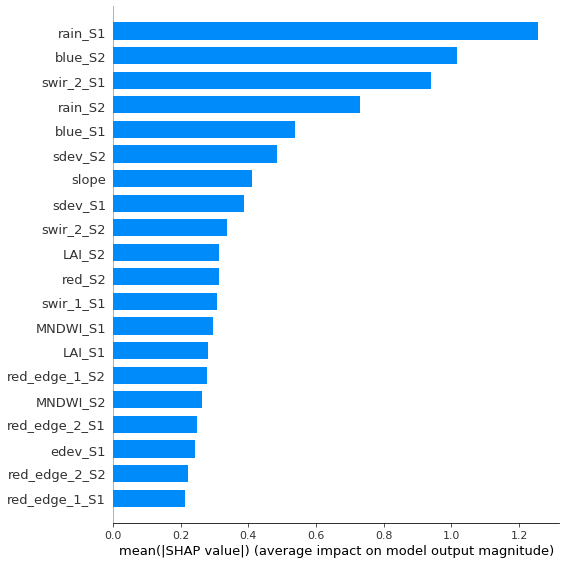

In [46]:
shap.summary_plot(shap_values, X, plot_type="bar", feature_names=df.columns[1:])

In [47]:
shap.force_plot(explainer.expected_value[1], shap_values[1][-1, :], X[-1, :], feature_names=df.columns[1:])

IndexError: invalid index to scalar variable.

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X, feature_names=df.columns[1:])

In [ ]:
shap.summary_plot(shap_values, X, feature_names=df.columns[1:])

In [ ]:
shap.summary_plot(shap_values[1], X, feature_names=df.columns[1:])

In [ ]:
shap_values